In [1]:
# importing  required libraries
import pandas as pd
from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Render plots inline
%matplotlib inline

In [3]:
# import data from csv file
titanic_df = pd.read_csv('train.csv')

# Checking the number of rows(observations) and colmumns(variables)
titanic_df.shape

(891, 12)

In [6]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
#overall info
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


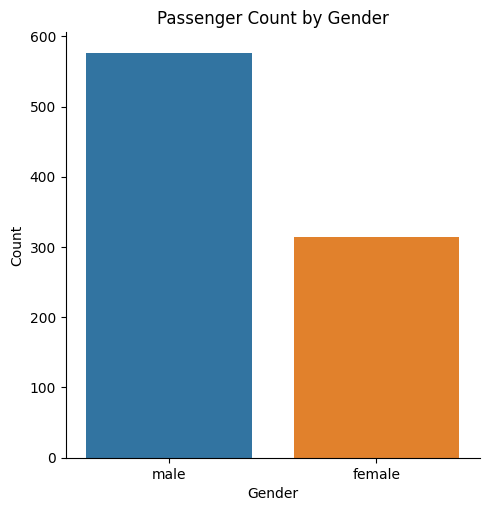

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot using catplot
sns.catplot(x='Sex', kind='count', data=titanic_df)

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Passenger Count by Gender')

# Show the plot
plt.show()


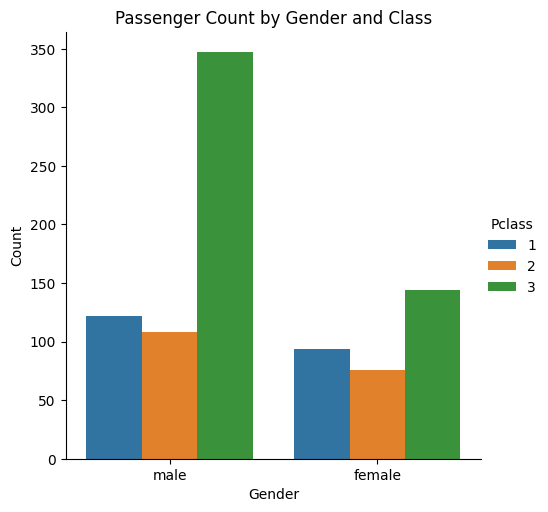

In [12]:
# Create a count plot with hue
sns.catplot(x='Sex', kind='count', data=titanic_df, hue='Pclass')

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Passenger Count by Gender and Class')

# Show the plot
plt.show()


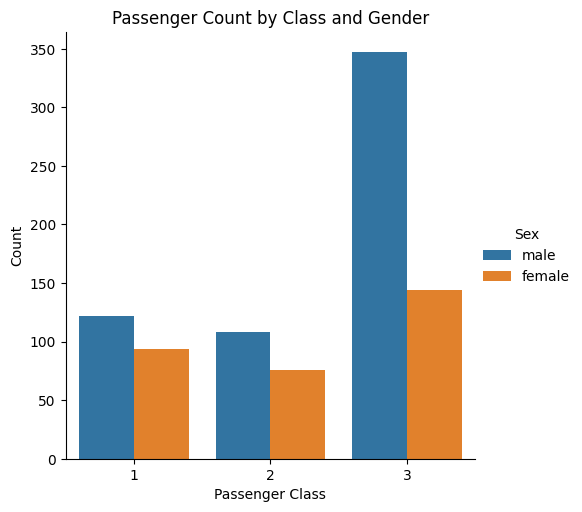

In [14]:
# Create a count plot with hue
sns.catplot(x='Pclass', kind='count', data=titanic_df, hue='Sex')

# Set plot labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Count by Class and Gender')

# Show the plot
plt.show()

In [15]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# First let's make a function to sort through the sex
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 18:
        return 'child'
    else:
        return sex

In [16]:
# Define a new column called 'person', remember to specify axis=1 for columns and not index

titanic_df['Person']= titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [17]:
# Let's see if this worked, check out the first ten rows
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


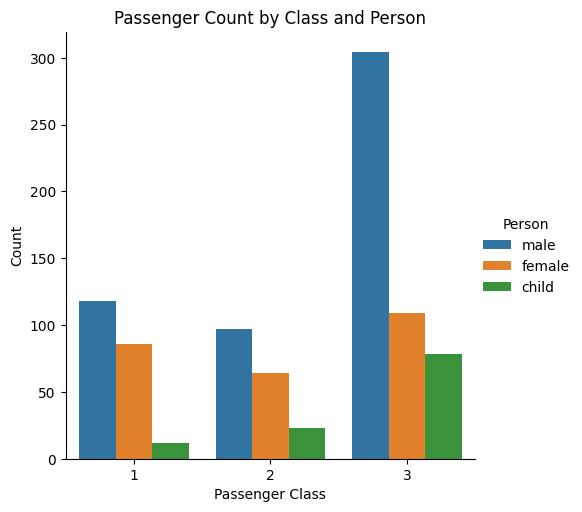

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded and cleaned your Titanic dataset as 'titanic_df'

# Double-check the column names and data in 'titanic_df'
# print(titanic_df.head())

# Create a count plot with hue based on the 'person' column
sns.catplot(x='Pclass', kind='count', data=titanic_df, hue='Person')

# Set plot labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Count by Class and Person')

# Show the plot
plt.show()


Interesting, quite a bit of children in 3rd class and not so many in 1st! How about we create a distribution of the ages to get a more precise picture of the who the passengers were.

<Axes: >

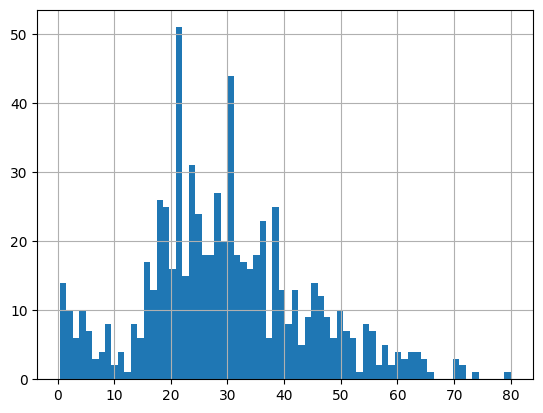

In [24]:
# Quick way to create a histogram using pandas
titanic_df['Age'].hist(bins=70)

In [25]:
titanic_df['Age'].mean() # Get the mean of Age

29.69911764705882

In [26]:
#overall comparison of male,female,child
titanic_df['Person'].value_counts()

male      519
female    259
child     113
Name: Person, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


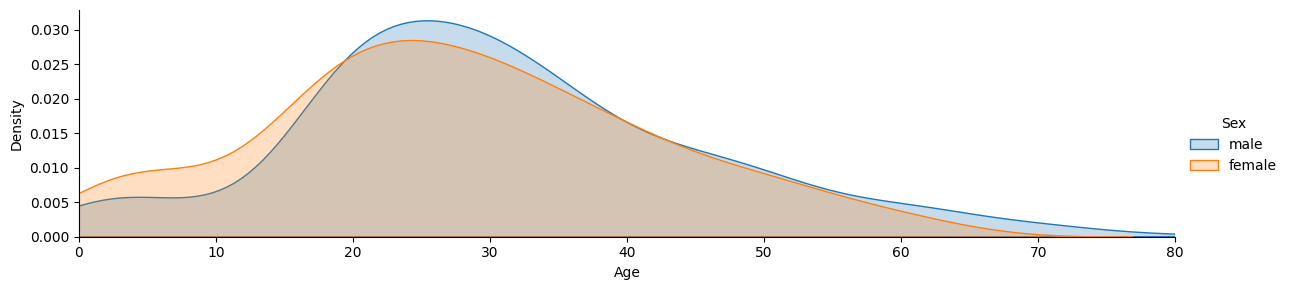

In [32]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


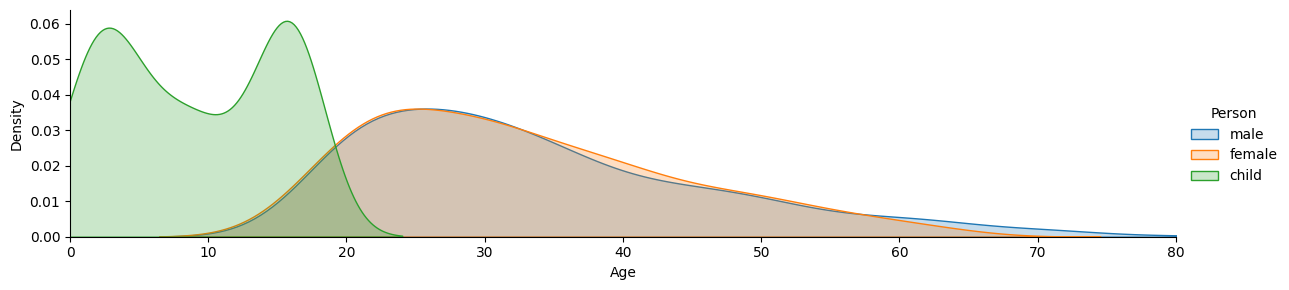

In [33]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)

fig.map(sns.kdeplot, 'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim= (0,oldest))

fig.add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


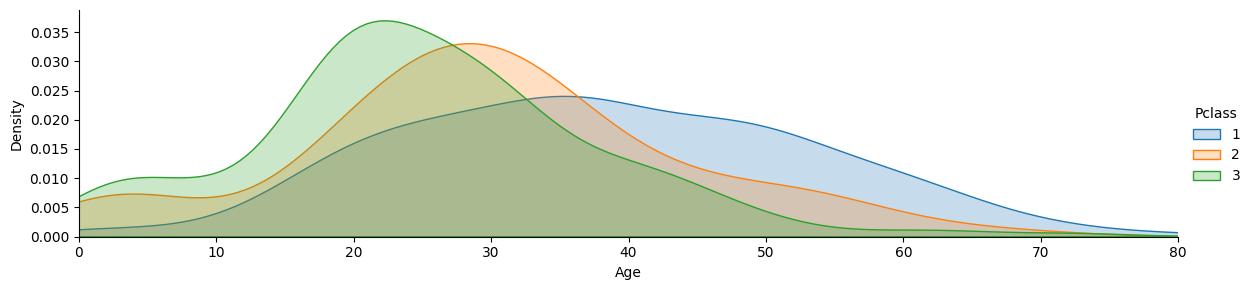

In [34]:
# Let's do the same for class by changing the hue argument:

fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)

fig.map(sns.kdeplot, 'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim= (0,oldest))

fig.add_legend()

In [36]:
#drop the NaN values and create a new object, deck

deck = titanic_df['Cabin'].dropna()

In [38]:
#preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

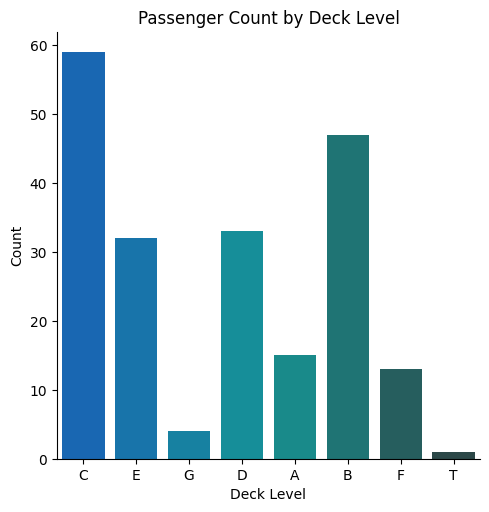

In [41]:
# Create a DataFrame from the levels list
cabin_df = pd.DataFrame(levels, columns=['Cabin'])

# Create a count plot using catplot
sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='winter_d')

# Set plot labels and title
plt.xlabel('Deck Level')
plt.ylabel('Count')
plt.title('Passenger Count by Deck Level')

# Show the plot
plt.show()


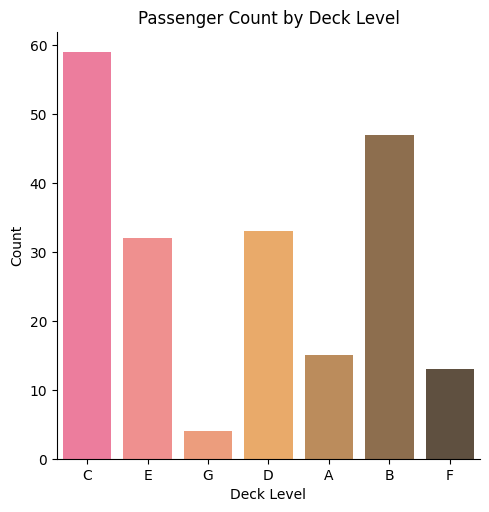

In [43]:
# Create a DataFrame from the levels list
cabin_df = pd.DataFrame(levels, columns=['Cabin'])

# Remove rows where 'Cabin' is equal to 'T'
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']

# Create a count plot using catplot
sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='spring_d')

# Set plot labels and title
plt.xlabel('Deck Level')
plt.ylabel('Count')
plt.title('Passenger Count by Deck Level')

# Show the plot
plt.show()


In [44]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


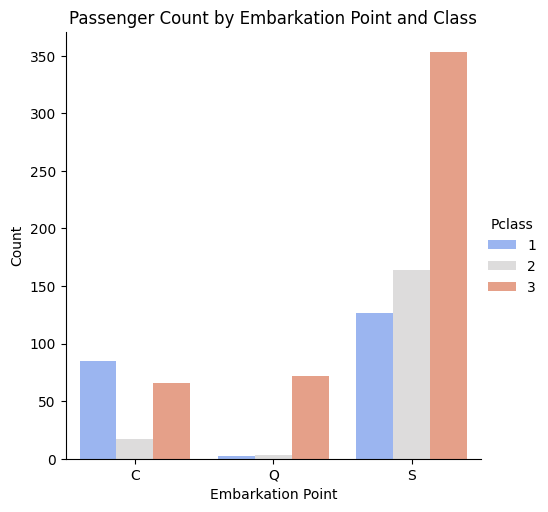

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded and cleaned your Titanic dataset as 'titanic_df'

# Create a categorical plot using catplot
sns.catplot(x='Embarked', data=titanic_df, hue='Pclass', order=['C', 'Q', 'S'], kind='count', palette='coolwarm')

# Set plot labels and title
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.title('Passenger Count by Embarkation Point and Class')

# Show the plot
plt.show()


In [47]:
# Let's start by adding a new column to define alone

# add the parent/child column with the sibsp column

titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.


In [48]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

<ipython-input-48-54f716244070>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'


In [49]:
# Check to make sure it worked

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [50]:
titanic_df['Alone']

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
          ...     
886          Alone
887          Alone
888    With Family
889          Alone
890          Alone
Name: Alone, Length: 891, dtype: object

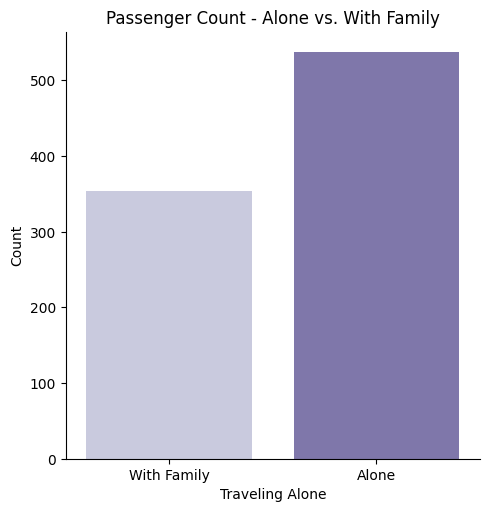

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded and cleaned your Titanic dataset as 'titanic_df'

# Create a categorical plot using catplot
sns.catplot(x='Alone', data=titanic_df, palette='Purples', kind='count')

# Set plot labels and title
plt.xlabel('Traveling Alone')
plt.ylabel('Count')
plt.title('Passenger Count - Alone vs. With Family')

# Show the plot
plt.show()


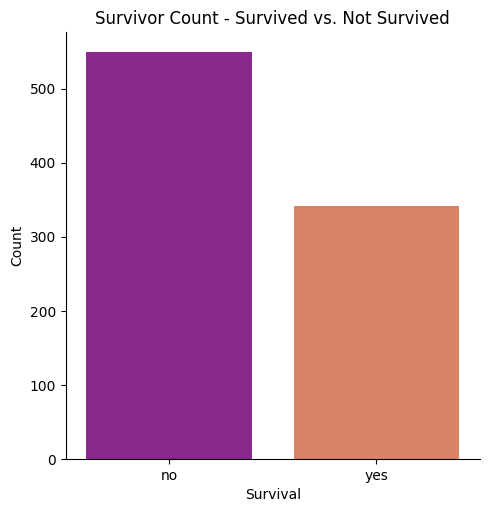

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded and cleaned your Titanic dataset as 'titanic_df'

# Create a categorical plot using catplot
sns.catplot(x='Survivor', data=titanic_df, palette='plasma', kind='count')

# Set plot labels and title
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survivor Count - Survived vs. Not Survived')

# Show the plot
plt.show()


So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate.

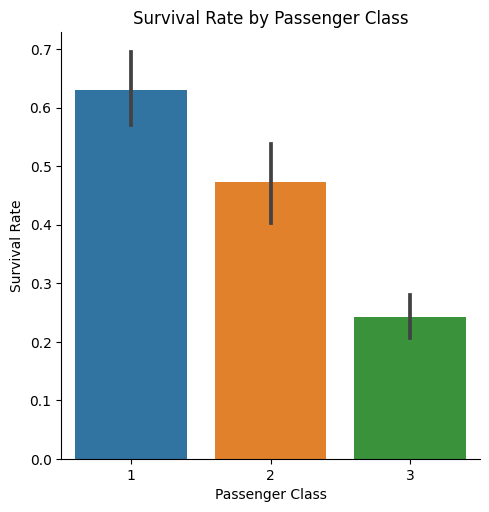

In [58]:
# Create a categorical plot using catplot
sns.catplot(x='Pclass', y='Survived', data=titanic_df, kind='bar')

# Set plot labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')

# Show the plot
plt.show()


Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

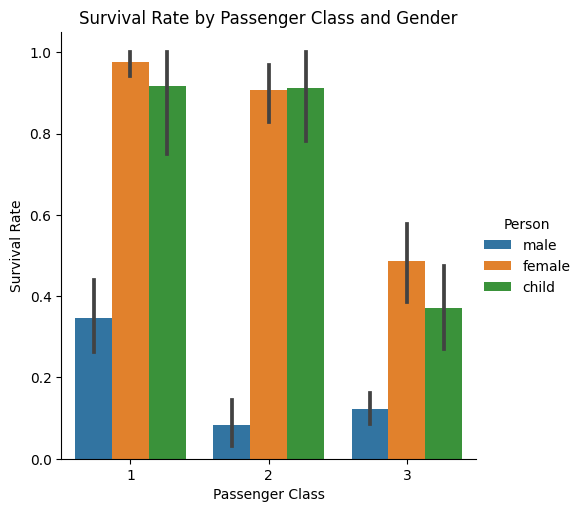

In [60]:
# Create a categorical plot using catplot
sns.catplot(x='Pclass', y='Survived', hue='Person', data=titanic_df, kind='bar')

# Set plot labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class and Gender')

# Show the plot
plt.show()


From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

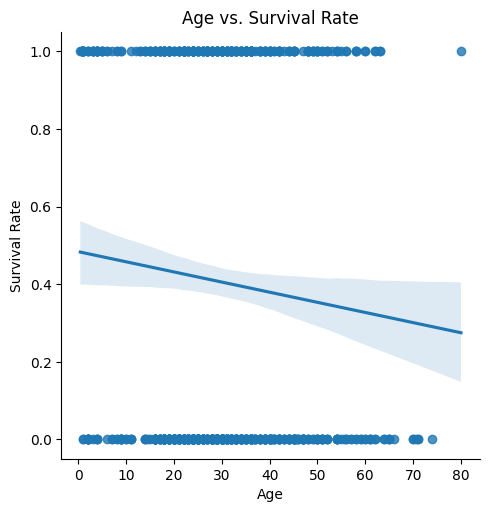

In [61]:
# Create a linear plot using lmplot
sns.lmplot(x='Age', y='Survived', data=titanic_df)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Age vs. Survival Rate')

# Show the plot
plt.show()


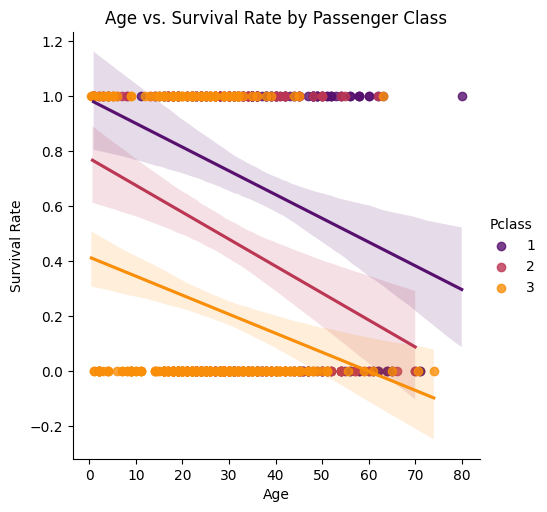

In [63]:
# Create a linear plot using lmplot with hue for passenger class
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, palette='inferno')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Age vs. Survival Rate by Passenger Class')

# Show the plot
plt.show()


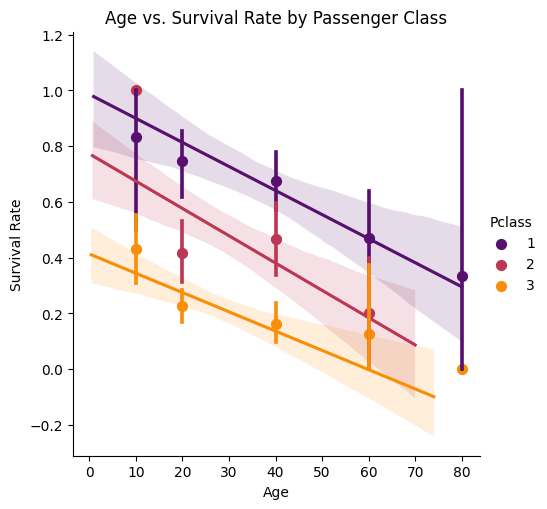

In [65]:
# Define custom age bins
generations = [10, 20, 40, 60, 80]

# Create a linear plot using lmplot with hue for passenger class and custom x_bins
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, palette='inferno', x_bins=generations)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Age vs. Survival Rate by Passenger Class')

# Show the plot
plt.show()


Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?


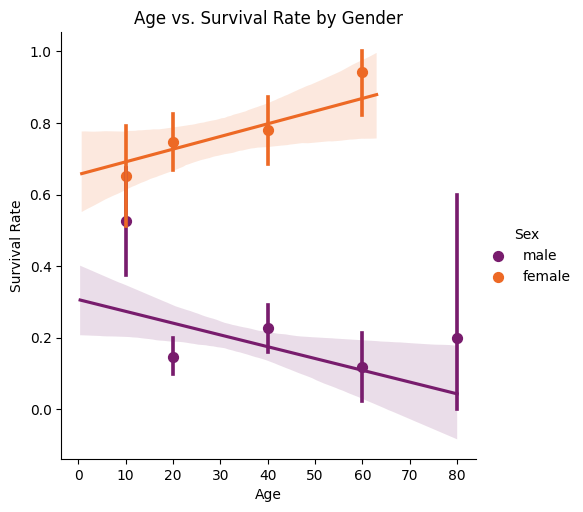

In [67]:
# Define custom age bins
generations = [10, 20, 40, 60, 80]

# Create a linear plot using lmplot with hue for gender and custom x_bins
sns.lmplot(x='Age', y='Survived', hue='Sex', data=titanic_df, palette='inferno', x_bins=generations)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Age vs. Survival Rate by Gender')

# Show the plot
plt.show()


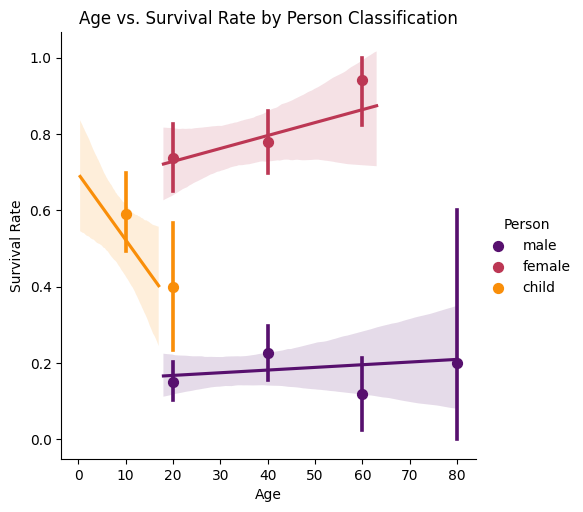

In [68]:
generations = [10, 20, 40, 60, 80]

# Create a linear plot using lmplot with hue for 'person' and custom x_bins
sns.lmplot(x='Age', y='Survived', hue='Person', data=titanic_df, palette='inferno', x_bins=generations)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Age vs. Survival Rate by Person Classification')

# Show the plot
plt.show()


  
-Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
-Did having a family member increase the odds of surviving the crash?


In [69]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


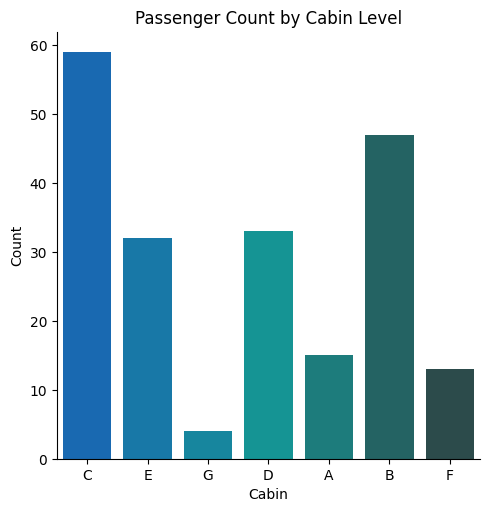

In [73]:
# Create a categorical plot using catplot
sns.catplot(x='Cabin', data=cabin_df, palette='winter_d', kind='count')

# Set plot labels and title
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.title('Passenger Count by Cabin Level')

# Show the plot
plt.show()


In [72]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


In [75]:
cabin_df = pd.concat([cabin_df, titanic_df['Sex']], axis=1)

In [76]:
cabin_df = pd.concat([cabin_df, titanic_df['Survived']], axis=1)

In [82]:
cabin_df.head()

,Cabin,Sex,Sex,Survived
0,C,male,male,0
1,C,female,female,1
2,E,female,female,1
3,G,female,female,1
4,C,male,male,0


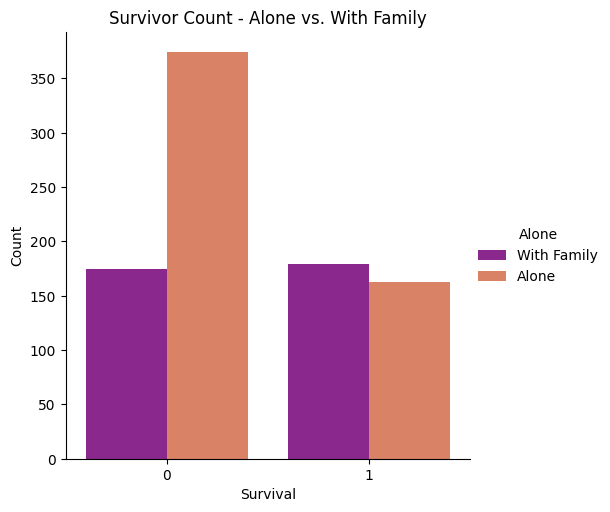

In [91]:
# Create a categorical plot using catplot
sns.catplot(x='Survived', data=titanic_df, hue='Alone', palette='plasma', kind='count')

# Set plot labels and title
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survivor Count - Alone vs. With Family')

# Show the plot
plt.show()


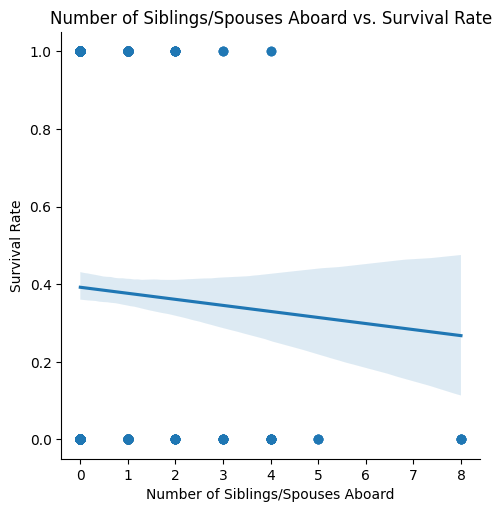

In [92]:
# Create a linear plot using lmplot
sns.lmplot(x='SibSp', y='Survived', data=titanic_df, palette='plasma')

# Set plot labels and title
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.title('Number of Siblings/Spouses Aboard vs. Survival Rate')

# Show the plot
plt.show()


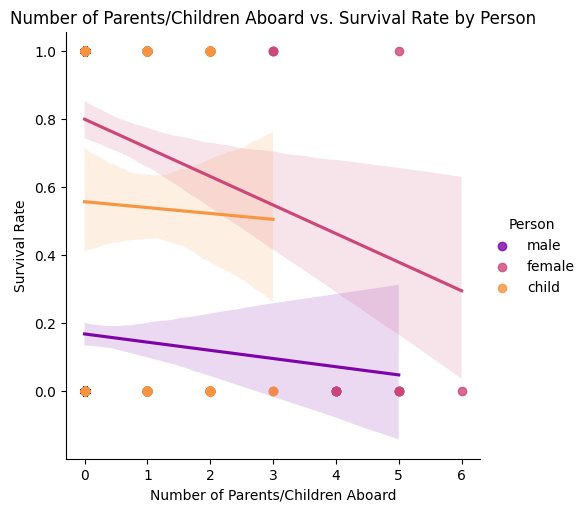

In [94]:
# Create a linear plot using lmplot with hue for 'Person'
sns.lmplot(x='Parch', y='Survived', data=titanic_df, hue='Person', palette='plasma')

# Set plot labels and title
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Rate')
plt.title('Number of Parents/Children Aboard vs. Survival Rate by Person')

# Show the plot
plt.show()


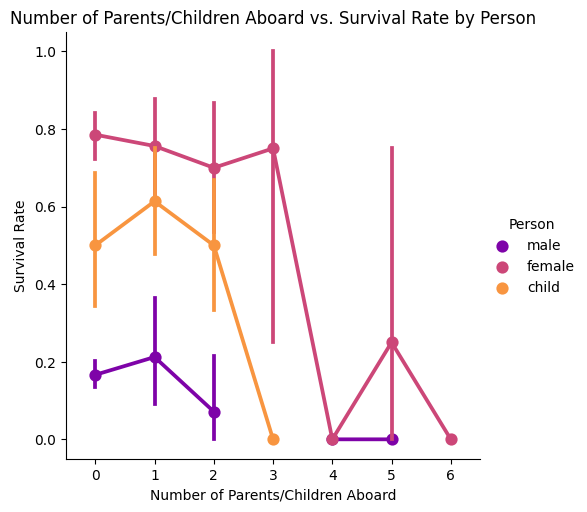

In [95]:
# Create a categorical plot using catplot
sns.catplot(x='Parch', y='Survived', data=titanic_df, hue='Person', palette='plasma', kind='point')

# Set plot labels and title
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Rate')
plt.title('Number of Parents/Children Aboard vs. Survival Rate by Person')

# Show the plot
plt.show()
